# Nghia Lam
## 1001699317

# Exploratory Data Analysis
## INSTRUCTIONS 

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution. 

Follow the prompts in the attached jupyter notebook. Download the data and place it in your working directory, or modify the path to upload it to your notebook. Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible.Make sure that you run your whole notebook before saving and sending it to us.

Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

Submission: Send in both a ipynb and a html/pdf file of your work. 

Good luck!



# Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Follow the lecture notes for ideas of how to perform EDA on your dataset. For help, here are the steps we talked about:

***Steps in EDA***:
1. Provide descriptions of your sample and features
2. Check for missing data
3. Identify the shape of your data
4. Identify significant correlations
5. Spot/deal with outliers in the dataset

These steps are a guidline. Try different things and share your insights about the dataset.

**Don't forget to add "markdown" cells to include your findings or to explain what you are doing** 

In [130]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [131]:
# Reading the CSV file
df_fish = pd.read_csv("Fish.csv")
 
# Printing top 5 rows
df_fish.head()

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

1. Provide descriptions of your sample and features

- How many rows and columns

In [132]:
df_fish.shape

(159, 7)

- What type of data?

In [133]:
df_fish.info

<bound method DataFrame.info of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

- Summary statistics

In [134]:
df_fish.describe()

Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000

2. Checking Missing Values

In [135]:
df_fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

- Checking Duplicates

In [136]:
df_fish.drop_duplicates(subset="Species")

Species  Weight  Length1  Length2  Length3   Height   Width
0        Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
35       Roach    40.0     12.9     14.1     16.2   4.1472  2.2680
55   Whitefish   270.0     23.6     26.0     28.7   8.3804  4.2476
61      Parkki    55.0     13.5     14.7     16.5   6.8475  2.3265
72       Perch     5.9      7.5      8.4      8.8   2.1120  1.4080
128       Pike   200.0     30.0     32.3     34.8   5.5680  3.3756
145      Smelt     6.7      9.3      9.8     10.8   1.7388  1.0476

- is our dataset balanced?

        It is not balanced at all


In [137]:
df_fish.value_counts("Species")

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
dtype: int64

Answer: our data set of fish is not balanced as some species are more predominant in this dataset then other

3. Checking Shape of our data

Some fish are very prodominent vs other fish, it looks like this might tip to one side or the other. If we seperate them it should be find.

- Countplot

In [138]:
sns.countplot(x='Species',data=df_fish)

<AxesSubplot:xlabel='Species', ylabel='count'>

<AxesSubplot:xlabel='Length1', ylabel='Weight'>

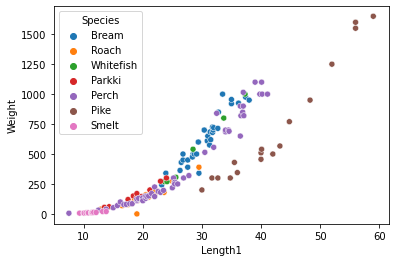

In [139]:
sns.scatterplot(data=df_fish, x='Length1', y='Weight', hue="Species")

In [140]:
sns.scatterplot(data=df_fish, x='Length1', y='Height', hue="Species")

<AxesSubplot:xlabel='Length1', ylabel='Height'>

In [141]:
sns.scatterplot(data=df_fish, x='Weight', y='Height', hue="Species")

<AxesSubplot:xlabel='Weight', ylabel='Height'>

In [142]:
sns.stripplot(y='Length1',x="Species",data=df_fish)

<AxesSubplot:xlabel='Species', ylabel='Length1'>

<AxesSubplot:xlabel='Species', ylabel='Weight'>

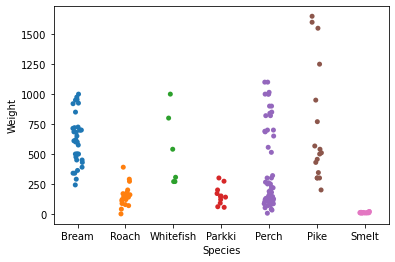

In [143]:
sns.stripplot(y='Weight',x="Species",data=df_fish)

In [144]:
sns.stripplot(y='Height',x="Species",data=df_fish)

<AxesSubplot:xlabel='Species', ylabel='Height'>

In [145]:
sns.violinplot(x="Species", y="Length1", data=df_fish, size=6)

<AxesSubplot:xlabel='Species', ylabel='Length1'>

In [146]:
sns.violinplot(x="Species", y="Weight", data=df_fish, size=6)

<AxesSubplot:xlabel='Species', ylabel='Weight'>

<AxesSubplot:xlabel='Species', ylabel='Height'>

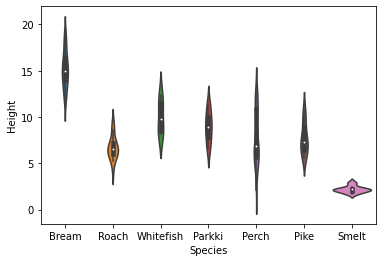

In [147]:
sns.violinplot(x="Species", y="Height", data=df_fish, size=6)

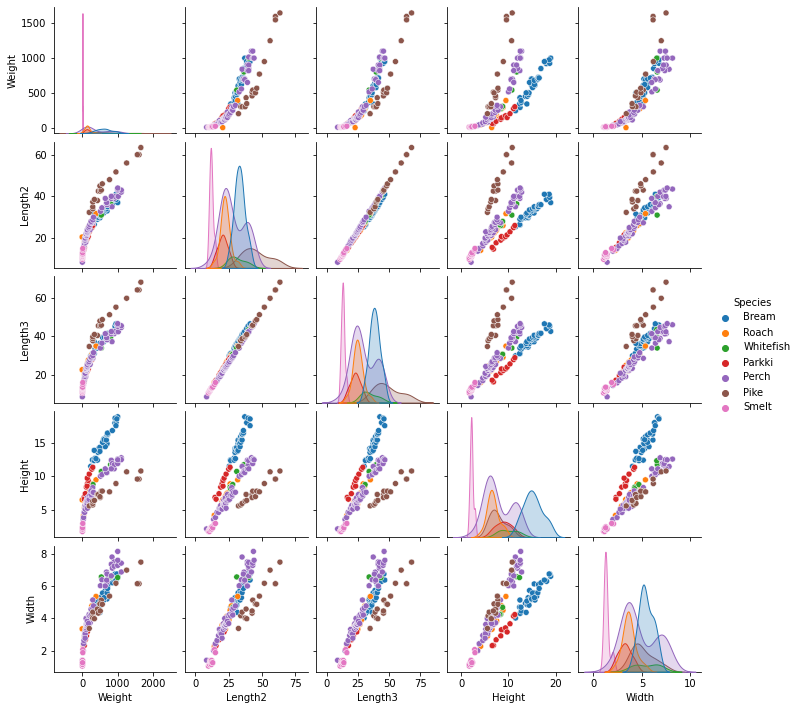

In [148]:
#compare all the variables
sns.pairplot(df_fish.drop(['Length1'],axis  = 1), hue= 'Species', height = 2)

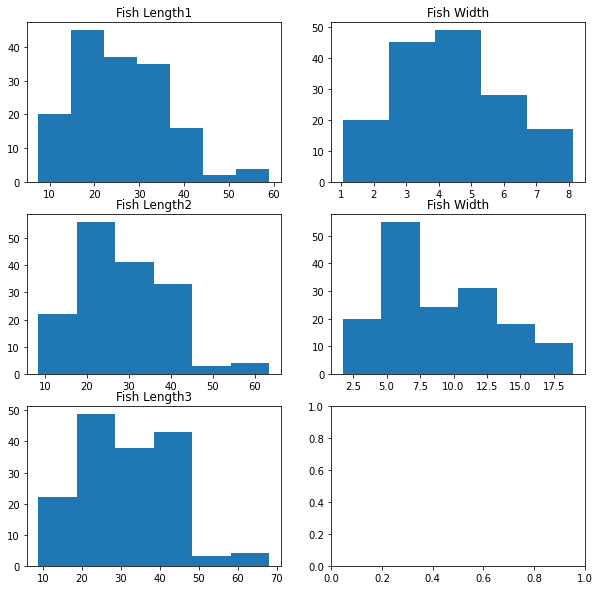

In [149]:
fig, axes = plt.subplots(3, 2, figsize=(10,10))
 
axes[0,0].set_title("Fish Length1")
axes[0,0].hist(df_fish['Length1'], bins=7)
 
axes[0,1].set_title("Fish Width")
axes[0,1].hist(df_fish['Width'], bins=5);
 
axes[1,0].set_title("Fish Length2")
axes[1,0].hist(df_fish['Length2'], bins=6);
 
axes[1,1].set_title("Fish Width")
axes[1,1].hist(df_fish['Height'], bins=6);

axes[2,0].set_title("Fish Length3")
axes[2,0].hist(df_fish['Length3'], bins=6);

c:\Users\nghia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nghia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nghia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

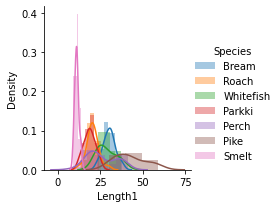

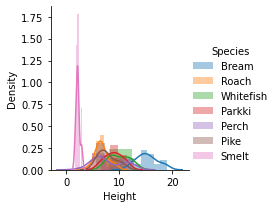

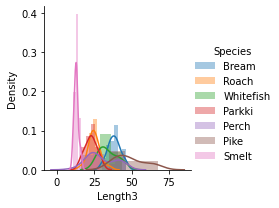

In [150]:
plot = sns.FacetGrid(df_fish, hue="Species")
plot.map(sns.distplot, "Length1").add_legend()
 
plot = sns.FacetGrid(df_fish, hue="Species")
plot.map(sns.distplot, "Width").add_legend()
 
plot = sns.FacetGrid(df_fish, hue="Species")
plot.map(sns.distplot, "Height").add_legend()
 
plot = sns.FacetGrid(df_fish, hue="Species")
plot.map(sns.distplot, "Length2").add_legend()

plot = sns.FacetGrid(df_fish, hue="Species")
plot.map(sns.distplot, "Length3").add_legend()
 
plt.show()

Smelt has one of the highest density among fishes in every category. The case could be made if we had more data on Smelt the density would decrease as it is also one of the fishes that has the least amount of data in our data set.

Pike is a very long fish, but not as tall

All the plots I have done so far is for each fish and comparing the Length, Width, and Heigth.
- Each fish looks like the have a nice median for where they are some are really long and some are really tall. However all there size still are somewhat close to each other.

4. Identify significant correlations

In [151]:
corr = df_fish.corr(method='pearson')
print(corr)

           Weight   Length1   Length2   Length3    Height     Width
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050
Length2  0.918618  0.999517  1.000000  0.994103  0.640441  0.873547
Length3  0.923044  0.992031  0.994103  1.000000  0.703409  0.878520
Height   0.724345  0.625378  0.640441  0.703409  1.000000  0.792881
Width    0.886507  0.867050  0.873547  0.878520  0.792881  1.000000


<AxesSubplot:>

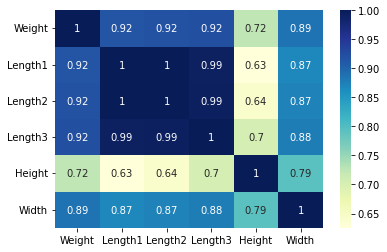

In [152]:
sns.heatmap(corr,annot=True,cmap="YlGnBu")

All three lengths correlate in a fairly similar way. 
It appears that a fish's overall size correlates quite well with its weight but not as well with its height. Even if there is a strong correlation between height and other factors, it is only comparable to everything else.

5. Detecting/handling outliers

In [153]:
fig, ax = plt.subplots(3, figsize=(9,20))
sns.boxplot(x="Species", y="Length1",data=df_fish, ax=ax[0])
sns.boxplot(x="Species", y="Weight",data=df_fish, ax=ax[1])
sns.boxplot(x="Species", y="Height",data=df_fish, ax=ax[2])

<AxesSubplot:xlabel='Species', ylabel='Height'>

<AxesSubplot:xlabel='Length1'>

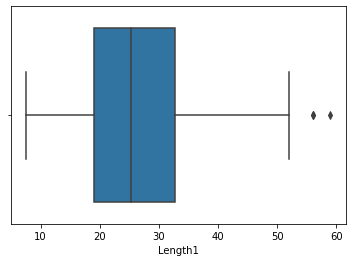

In [154]:
sns.boxplot(x="Length1", data=df_fish)

In [155]:
sns.boxplot(x="Length2", data=df_fish)

<AxesSubplot:xlabel='Length2'>

<AxesSubplot:xlabel='Length3'>

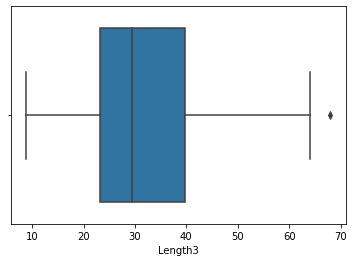

In [156]:
sns.boxplot(x="Length3", data=df_fish)

Old Shape:  (159, 7)
New Shape:  (156, 7)


<AxesSubplot:xlabel='Length1'>

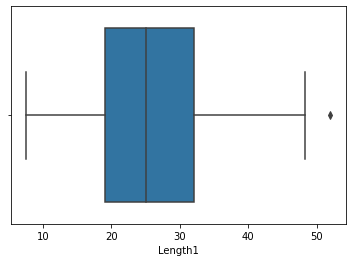

In [157]:
#remove outliers
# IQR
Q1 = np.percentile(df_fish['Length1'], 25,
                interpolation = 'midpoint')
 
Q3 = np.percentile(df_fish['Length1'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_fish.shape)
 
# Upper bound
upper = np.where(df_fish['Length1'] >= (Q3+1.5*IQR))
 
# Lower bound
lower = np.where(df_fish['Length1'] <= (Q1-1.5*IQR))
 
# Removing the Outliers
df_fish.drop(upper[0], inplace = True)
df_fish.drop(lower[0], inplace = True)
 
print("New Shape: ", df_fish.shape)
 
sns.boxplot(x='Length1', data=df_fish)

There are some outliers in the length department, probably something like a really long Pike that is effecting the dataset
